In [75]:
library(data.table)

In [76]:
data=read.table("all.features.txt",header=TRUE,sep=',',row.names = 1)

In [77]:
labels=data$dataset
editing_value=data$editing_value
data$dataset=NULL
data$editing_value=NULL

In [79]:
data=na.omit(t(data))

In [85]:
head(data)

,0,1,2,3,4,5,6,7,8,9,⋯,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729
all_stem_length,29,30,30,28,28,30,30,27,27,30,⋯,44,44,44,42,44,46,44,44,44,44
d1_3prm_cp_internal.G.C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
d1_distance,2,2,2,2,2,2,2,2,2,2,⋯,4,4,2,5,1,1,4,1,1,1
d1_length,2,2,2,2,2,3,3,2,2,2,⋯,6,6,2,6,2,10,6,2,2,2
d1_struct.I,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
d1_struct.S,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


In [86]:
data.pca=prcomp(t(data))

In [87]:
head(data.pca$x)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73
0,-19.24393,-8.013900,-6.570028,-2.1382965,2.658944,-3.991945,-0.4045551,-0.4971581,1.572534,-1.16604636,⋯,0.0015791575,0.000732697,-2.261994e-14,7.368170e-15,7.994570e-15,-2.681102e-15,7.141311e-16,4.761046e-16,5.881837e-16,3.983899e-15
1,-18.08929,-7.308631,-6.933183,-3.4340918,2.838953,-3.563256,-0.9294225,0.1612884,1.031442,-0.06404776,⋯,0.0033015632,-0.001351082,-1.333592e-14,1.930307e-14,1.682084e-14,-2.375791e-15,2.908586e-16,2.245697e-16,4.463701e-16,9.868081e-15
2,-18.07818,-7.285895,-6.890599,-3.4123991,2.834365,-3.588991,-0.9094803,0.1004571,1.142860,0.05430276,⋯,-0.0008059069,-0.004972632,-1.683941e-14,-1.365668e-14,2.773052e-15,-1.182301e-15,-8.887534e-16,9.427453e-16,2.772345e-16,-8.755911e-15
3,-21.18932,-9.400242,-6.034430,-0.4208637,2.358494,-4.358482,0.2411504,-1.1005654,1.577016,-0.47485012,⋯,-0.0004303962,-0.001462259,-4.263301e-14,6.334275e-15,8.483762e-15,-3.569280e-15,6.239255e-16,1.001726e-15,4.051704e-16,3.373276e-15
4,-21.18932,-9.400242,-6.034430,-0.4208637,2.358494,-4.358482,0.2411504,-1.1005654,1.577016,-0.47485012,⋯,-0.0004303962,-0.001462259,-4.263301e-14,6.334275e-15,8.483762e-15,-3.569280e-15,6.239255e-16,1.001726e-15,4.051704e-16,3.373276e-15
5,-17.81577,-6.882014,-6.837059,-2.7446127,2.841928,-2.264999,-0.6173771,0.2221380,1.440151,-0.39347570,⋯,0.0011814714,-0.001606879,-1.063745e-17,1.960144e-14,1.646696e-14,-2.348035e-15,1.520807e-16,2.367128e-16,4.947255e-16,1.003461e-14


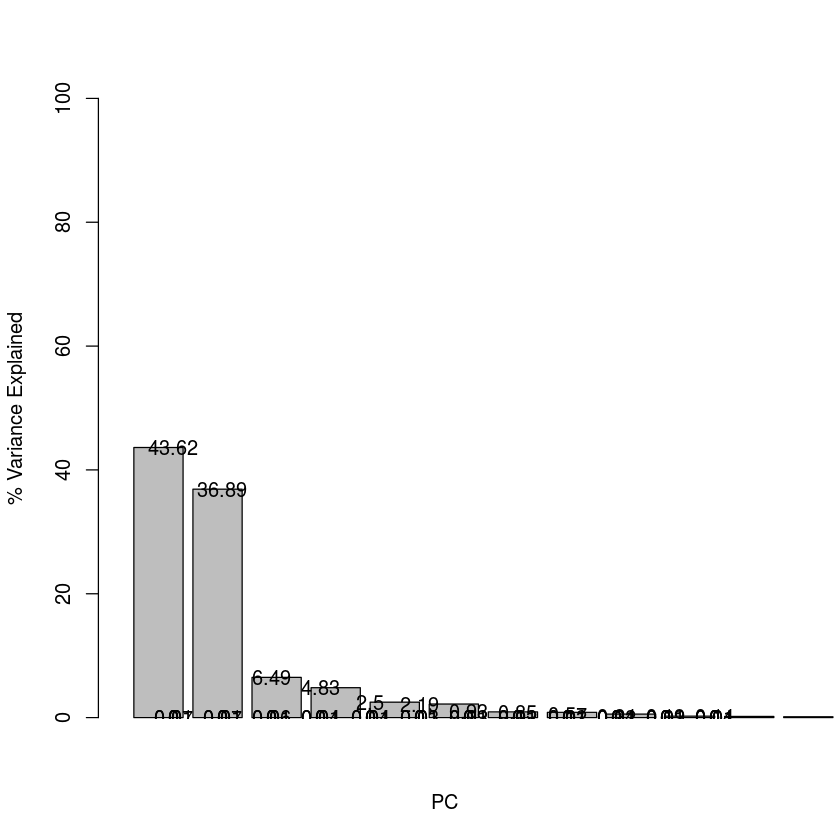

In [88]:
barplot(100*data.pca$sdev^2/sum(data.pca$sdev^2),width=1,xlim=c(0,13),ylim=c(0,100),xlab="PC",ylab="% Variance Explained")
text(1:12,100*data.pca$sdev^2/sum(data.pca$sdev^2),labels=round(100*data.pca$sdev^2/sum(data.pca$sdev^2),2))


In [89]:
pca_df=as.data.frame(data.pca$x)

In [90]:
nrow(pca_df)

[1] 2730

In [91]:
ncol(pca_df)

[1] 73

In [92]:
length(labels)

[1] 2730

In [93]:
pca_df$label=labels
pca_df$editing_value=editing_value

In [94]:
library(ggplot2)

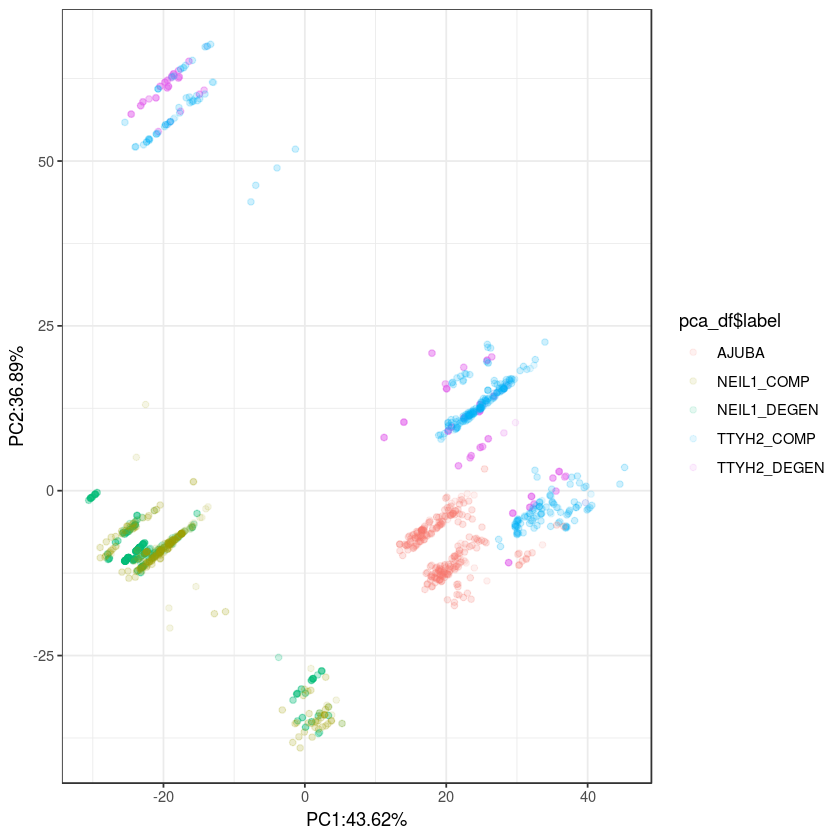

In [95]:
p1=ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC2,color=pca_df$label))+
  geom_point(show.legend=TRUE,alpha=0.1) +
  xlab("PC1:43.62%")+
  ylab("PC2:36.89%")+
theme_bw()
p1

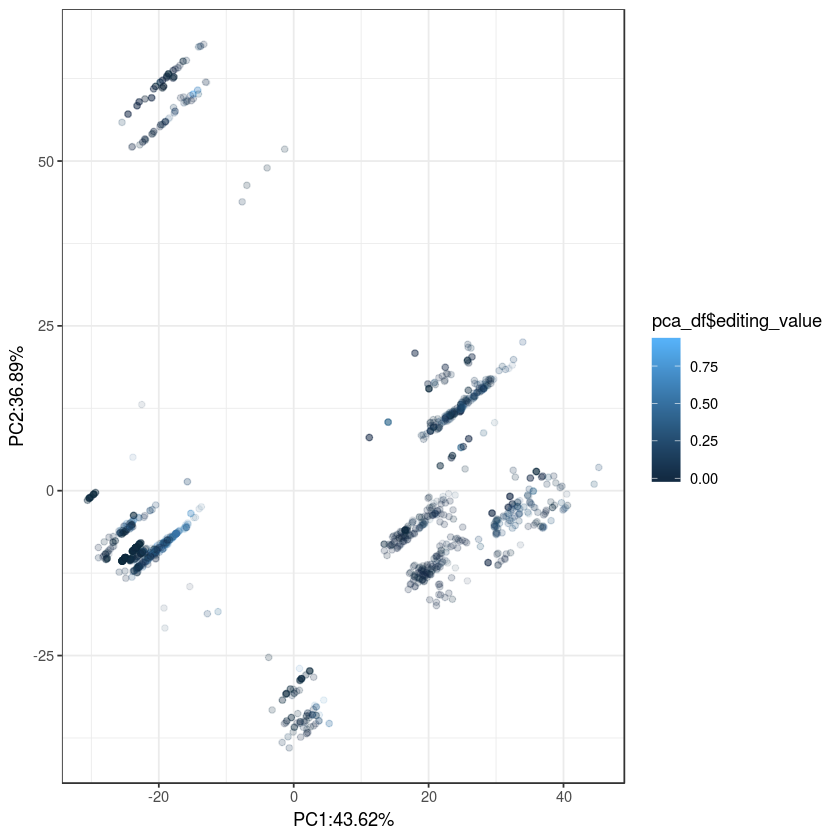

In [98]:
p2=ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC2,color=pca_df$editing_value))+
  geom_point(show.legend=TRUE,alpha=0.1) +
  xlab("PC1:43.62%")+
  ylab("PC2:36.89%")+
theme_bw()
p2

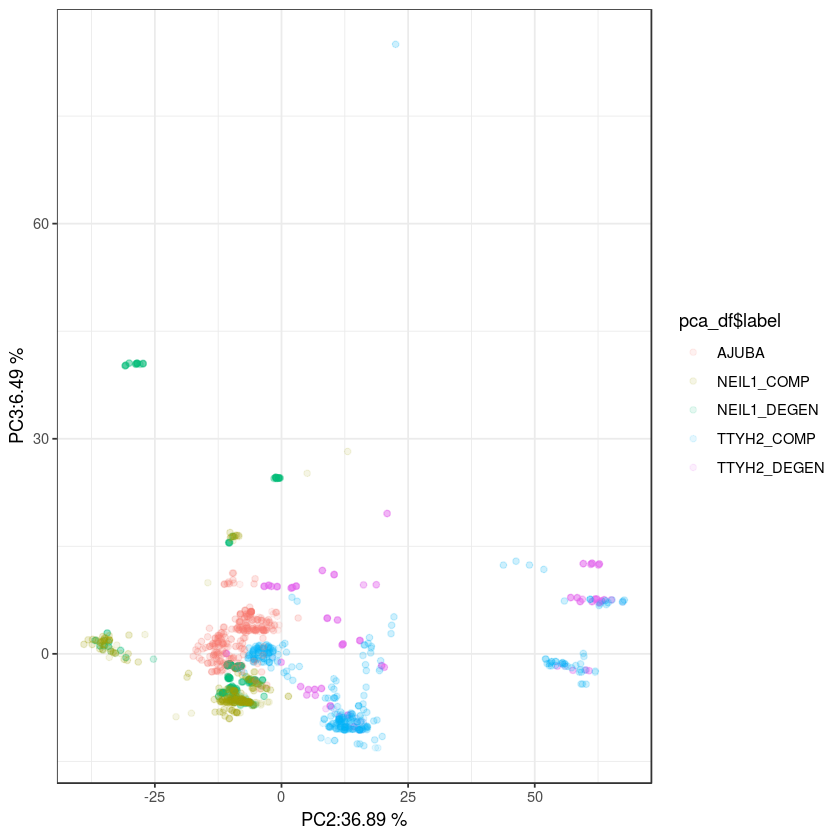

In [96]:
p3=ggplot(data=pca_df,aes(x=pca_df$PC2,y=pca_df$PC3,color=pca_df$label))+
  geom_point(show.legend=TRUE,alpha=0.1) +
  xlab("PC2:36.89 %")+
  ylab("PC3:6.49 %")+
theme_bw()
p3

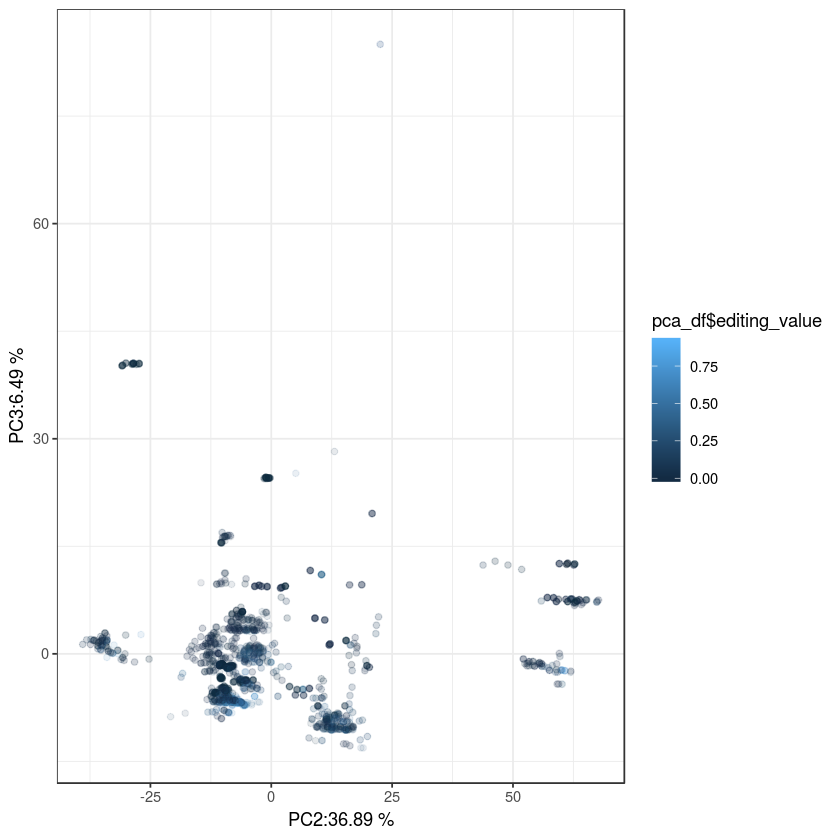

In [99]:
p4=ggplot(data=pca_df,aes(x=pca_df$PC2,y=pca_df$PC3,color=pca_df$editing_value))+
  geom_point(show.legend=TRUE,alpha=0.1) +
  xlab("PC2:36.89 %")+
  ylab("PC3:6.49 %")+
theme_bw()
p4

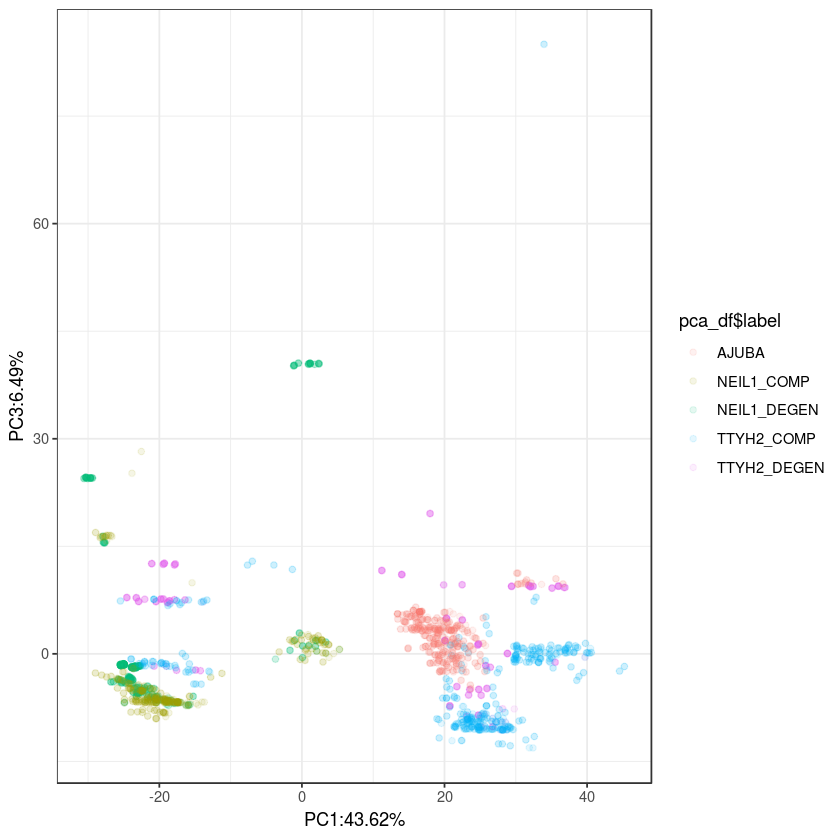

In [97]:
p5=ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC3,color=pca_df$label))+
  geom_point(show.legend=TRUE,alpha=0.1) +
  xlab("PC1:43.62%")+
  ylab("PC3:6.49%")+
theme_bw()
p5

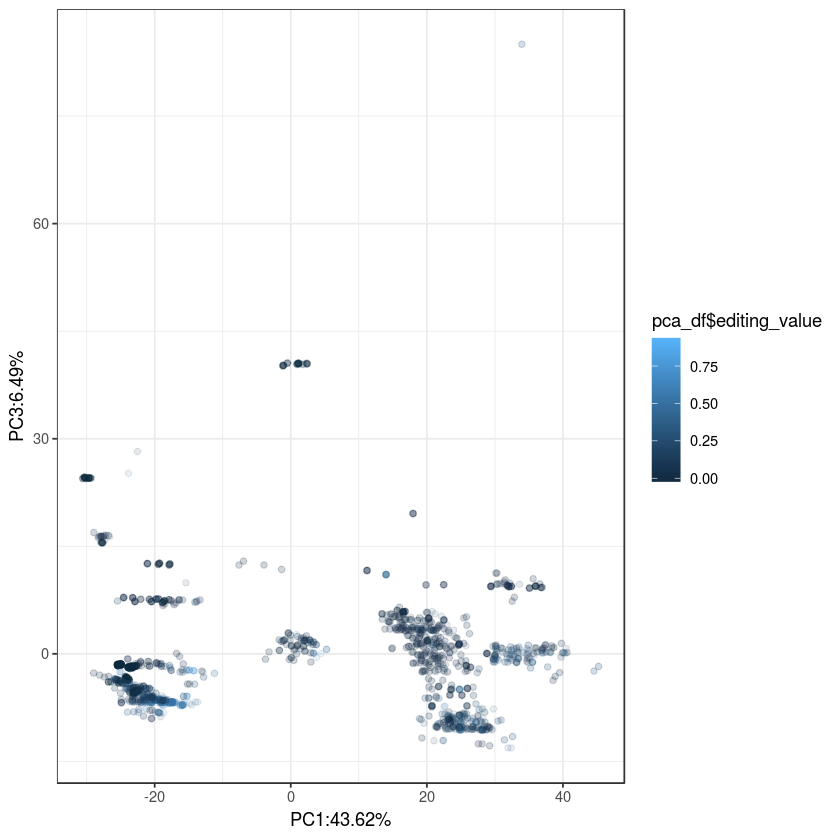

In [100]:
p6=ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC3,color=pca_df$editing_value))+
  geom_point(show.legend=TRUE,alpha=0.1) +
  xlab("PC1:43.62%")+
  ylab("PC3:6.49%")+
theme_bw()
p6